In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file = pd.ExcelFile('basedados.xlsx')
print(file.sheet_names)

data = file.parse(0)

# Mostrando as 5 primeiras linhas do dataset
data.head()

# Primeiro, precisamos saber com o que exatamente estamos trabalhando, logo, devemos abrir o dataset disponibilizado
# para termos real noção do que se trata.

# Agora aberto, podemos ver o que as colunas representam e seus respectivos valores. Com isso podemos facilmente ver que
# o dataset se trata das informações sobre sorteios de MegaSenas, que tais sorteios ocorrem semanalmente, e que a quantia
# de ganhadores de sena é muito menor que a de ganhadore de Quina, que por sua vez é muito menor que Ganhadores de Quadra.

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


In [14]:
# Geramos as informações gerais do dataset
print(data.info())

print("\nPrimeira MegaSena a ocorrer:", data['Data Sorteio'].iloc[0])
print("Mais recente MegaSena a ocorrer:", data['Data Sorteio'].iloc[-1])

# Com estas novas informações, agora descobrimos que o dataset contém registro de TODAS as MegaSenas que ocorreram
# desde seu início até a publicação do dataset em questão. Também sabemos agora quando ocorreu a primeira MegaSena.
# 11 de março de 1996
# de Março de 1996 para Março de 2018, também sabemos que se passaram mais de 22 anos!

sorteios_ocorridos = len(data['Concurso'].unique())
sorteios_ocorridos

# Houveram 2025 sorteios de lá pra cá!! Dá pra acreditar?!


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 0 to 2024
Data columns (total 18 columns):
Concurso             2025 non-null int64
Data Sorteio         2025 non-null datetime64[ns]
Dezena1              2025 non-null int64
Dezena2              2025 non-null int64
Dezena3              2025 non-null int64
Dezena4              2025 non-null int64
Dezena5              2025 non-null int64
Dezena6              2025 non-null int64
Arrecadacao_Total    2025 non-null float64
Ganhadores_Sena      2025 non-null int64
Rateio_Sena          2025 non-null float64
Ganhadores_Quina     2025 non-null int64
Rateio_Quina         2025 non-null float64
Ganhadores_Quadra    2025 non-null int64
Rateio_Quadra        2025 non-null float64
Acumulado            2025 non-null object
Valor_Acumulado      2025 non-null float64
Estimativa_Prêmio    2025 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(11), object(1)
memory usage: 380.6+ KB
None

Primeira MegaSena a ocorrer: 1996-03-11 00:00

2025

In [36]:
Sena_mean = data['Ganhadores_Sena'].mean()
Quina_mean = data['Ganhadores_Quina'].mean()
Quadra_mean = data['Ganhadores_Quadra'].mean()

print("A média de ganhadores da Sena é:", Sena_mean)
print("A média de ganhadores da Quina é:", Quina_mean)
print("A média de ganhadores da Quadra é:", Quadra_mean)

# Como no início vimos somente as 5 primeiras MegaSenas, estávamos apenas supondo sobre sobre as informações, gerais.
# Porém, nesta célula, mostramos que é muito mais raro alguém ganhar a Sena do que a Quina, e é muito mais fácil alguém
# ganhar a Quina do que a Quadra.

# Pode-se notar também, que ,estatisticamente, a cada 100 sorteios, só 34 possuem ganhadores.

A média de ganhadores da Sena é: 0.3412345679012346
A média de ganhadores da Quina é: 112.9753086419753
A média de ganhadores da Quadra é: 7281.367901234568


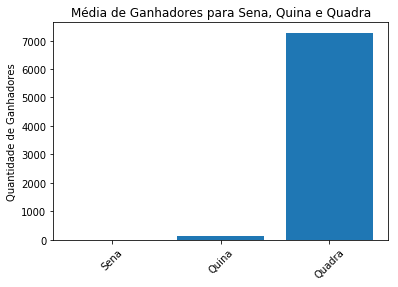

In [106]:
# Para melhor visualização entre a diferença dessas médias, faremos um
# gráfico em barras para comparação

# Criamos um subplot que retorna ambas a figura quanto os eixos.
fig, ax = plt.subplots()

# Pegamos esta função do numpy para organizar o eixo x melhor.
from numpy import arange
bar_positions = arange(3) + 1

# Defino os pulos entre o eixo x, o que cada barra representa, e títulos.
tick_positions = range(1,4)
ax.set_title("Média de Ganhadores para Sena, Quina e Quadra")
ax.set_xticks(tick_positions)
ax.set_ylabel("Quantidade de Ganhadores")
ax.set_xticklabels(['Sena', 'Quina', 'Quadra'], rotation=45)

# Então, finalmente fazemos com que as barras recebam o valor médio
# entre cada tipo de prêmio. A Sena, a Quina e a Quadra.
num_cols = [Sena_mean, Quina_mean, Quadra_mean]
bar_heights = num_cols
ax.bar(bar_positions, bar_heights, 0.8)

# O gráfico em barras em questão, representa a quantidade média de ganhadores da Sena,
# da Quina, e da Quadra considerando todos os sorteios. É extramamente perceptível o quão maior
# é a diferença entre a média de ganhadores da Quadra em relação ás demais.

plt.show()

In [81]:
# Nesta célula, analisamos quantos ganhadores da Sena houveram em todos os sorteios.
vencedores = 0
for i in data.Ganhadores_Sena:
    vencedores = vencedores + i
print(vencedores)

# Ou seja, em 2025 sorteios através de 22 anos, cada qual recebendo as milhões de apostas das pessoas,
# somente, 691 pessoas (no máximo*) conseguiram acertar os 6 números.

691/22

# Aproximadamente, é como se a cada ano 31 pessoas conseguissem acertar os 6 números exatos. Mesmo que hajam dezenas
# de sorteios num único ano, com milhões de apostadores.

## *: Pois apesar de altamente improvável, ainda é possível que uma mesma pessoa tenha ganho a Sena mais de 1 vez.
##   Por isso que no máximo 691 pessoas.


# Engraçado é perceber que se tomássemos probabilidade como uma certeza absoluta, num exemplo em que estivessemos na
# última semana do ano, e somente 11 pessoas acertaram a Sena durante o ano inteiro, as chances de terem muitos
# ganhadores no sorteio desta semana em questão são muito boas em comparação com o resto. Então seria recomendado que
# você, como pessoa, devesse apostar na MegaSena. É muito louco isso de probabilidade e chances. KKKKKK

691


31.40909090909091

In [82]:
# Considerando a repercussão que a MegaSena possui, e a quanto tempo ainda se mantém de pé, muito provavelmente
# eles devem ganhar bastante dinheiro com os sorteios Acumulados.

acumulados = 0
for i in data.Acumulado:
    if i == "SIM":
        acumulados = acumulados + 1
# Declaramos a variável concurso para receber a quantidade de concursos que houveram        
concursos = len(data.Concurso)

print(acumulados)
print(int (acumulados*100/concursos), "%")

# Agora vemos claramente que existe muitaaaa vantagem para quem organiza a MegaSena.
# Aproximadamente, apenas 1 a cada 4 sorteios possui um ganhador para a Sena, nos outros 3, a empresa recebe um lucro
# multi-milionário.

1548
76 %


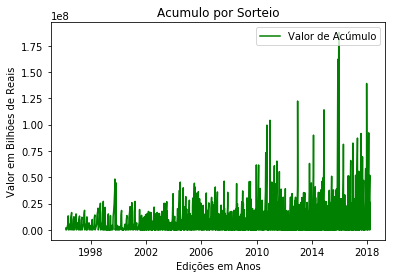

In [115]:
# Com o objetivo de obter novas informações, foi decidido analisar o movimento
# da função definida por 'Valor_Acumulado' x 'Data Sorteio'.

# Geramos nosso gráfico de Valor_Acumulado por Data Sorteio
### Cor verde é boa de ver.
plt.plot(data['Data Sorteio'], data['Valor_Acumulado'], c='green', label="Valor de Acúmulo")
plt.ylabel('Valor em Bilhões de Reais')
plt.xlabel('Edições em Anos')
plt.legend(loc='upper right')
plt.title('Acumulo por Sorteio')

# As funções acima criam as legendas, e mudam certas detalhes quanto à
# visualização do gráfico.

plt.show()

# Aqui podemos observar que, de certa forma, o valor acumulado pela MegaSena,
# vem aumentando ao longo dos anos. Com um pico em torno de 2016.

In [116]:
# Neste célula analisamos o quanto de dinheiro a empresa organizadora da MegaSena teve de pagar aos ganhadores
# ao longo de seus anos de existência.
valor_Sena = 0
valor_Quina = 0
valor_Quadra = 0

# Pego a quantidade de ganhadores e multiplico por quanto cada um ganha, logo, terei o total de determinado prêmio.
for i, valor in enumerate(data.Ganhadores_Sena):
    valor_Sena = valor_Sena + (valor * data.Rateio_Sena[i])
    
for i, valor in enumerate(data.Ganhadores_Quina):
    valor_Quina = valor_Quina + (valor * data.Rateio_Quina[i])
    
for i, valor in enumerate(data.Ganhadores_Quadra):
    valor_Quadra = valor_Quadra + (valor * data.Rateio_Quadra[i])
    
print("Distribuíram ", int (valor_Quadra), " reais no total para ganhadores da Quadra.\n")
print("Distribuíram ", int (valor_Quina), " reais no total para ganhadores da Quina.\n")
print("Distribuíram ", int (valor_Sena), " reais no total para ganhadores da Sena.\n")

custo_total = valor_Quadra + valor_Quina + valor_Sena
print("Ou seja, tiveram um custo total de: ", int(custo_total), " de reais")

# Podemos ver que ao longo dos seus 22 anos de existência, a MegaSena premiou uma quantia muito alta de dinheiro.

Distribuíram  5153872752  reais no total para ganhadores da Quadra.

Distribuíram  4005254754  reais no total para ganhadores da Quina.

Distribuíram  12085571422  reais no total para ganhadores da Sena.

Ou seja, tiveram um custo total de:  21244698928  de reais


In [117]:
# Como 21 bilhões e 240 milhões é um valor incrivelmente alto, me perguntei se a MegaSena realmente saía no lucro,
# ou se ela na verdade ganhava pouco.
# Resultado? Não podia estar mais enganado!

# Aqui faço a contagem do quanto a MegaSena ganhou em todos os sorteios.
acumulado_valor = 0
for i in data.Valor_Acumulado:
    acumulado_valor = acumulado_valor + i
    
print(int(acumulado_valor))

lucro = acumulado_valor - custo_total
print(int(lucro))
# Ao subtrairmos o valor de ganho total da MegaSena, com o valor de custo total, ou seja, o tanto de dinheiro que
# a empresa premiou á ganhadores, obtivemos o lucro total da empresa.

# O qual pudemos que perceber que era nada mais nada menos do que em torno de 3 bilhões e 730 milhões de reais, de LUCRO.
int(lucro/22)
# Mesmo que dividíssemos esse valor nos 22 anos, ainda seriam mais de 169 milhões por ano, apenas por gerenciarem aposas KKKKKKKKKKK.

24977500438
3732801510


169672795

In [118]:
# Para os superticiosos, podemos tentar analisar quais os números que saíram com mais frequência nos sorteios.

cols = ['Dezena1','Dezena2','Dezena3','Dezena4','Dezena5','Dezena6'] 
dezenas = data[cols]

dezenas = dezenas.unstack().value_counts()

# E então achamos os 6 números mais sorteados de todos os sorteios.

seis_maiores_frequencias = dezenas[0:6]
print(seis_maiores_frequencias)
print("\n")
# Caso você seja supersticioso, e acredite que ao usar os 6 números mais frequentes vocẽ terá mais chance,
# então o recomendo que aposte nos números: 5, 53, 10, 23, 4, 54.

seis_menores_frequencias = dezenas[-6:]
print(seis_menores_frequencias)
# E caso acredite que os 6 menos usados dão azar,
# aconselho-o a jamais apostar nos númeors: 9, 15, 21, 22, 55, 26


5     233
53    230
10    227
23    224
4     224
54    221
dtype: int64


9     183
15    183
21    178
22    177
55    174
26    164
dtype: int64


In [119]:
# Aqui é impressa o dataset como um todo, na forma de um DataFrame
pd.DataFrame(data)

,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.000000e+00,17,39158.92,2016,330.21,SIM,1.714650e+06,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2.307162e+06,65,14424.02,4488,208.91,NÃO,0.000000e+00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,3.911925e+05,62,10515.93,4261,153.01,NÃO,0.000000e+00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.000000e+00,39,15322.24,3311,180.48,SIM,7.170808e+05,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.000000e+00,98,5318.10,5399,96.53,SIM,1.342489e+06,0
5,6,1996-04-15,19,40,7,13,22,47,0.0,0,0.000000e+00,109,7214.66,7147,110.03,SIM,2.286166e+06,0
6,7,1996-04-22,56,38,21,20,3,5,0.0,0,0.000000e+00,100,8746.05,5736,152.48,SIM,3.335692e+06,0
7,8,1996-04-29,53,17,38,4,47,37,0.0,0,0.000000e+00,60,16084.11,5262,183.40,SIM,4.493748e+06,0
8,9,1996-05-06,55,43,56,54,8,60,0.0,0,0.000000e+00,17,60043.79,2175,469.31,SIM,5.718641e+06,0
9,10,1996-05-13,25,4,18,57,21,38,0.0,0,0.000000e+00,251,6638.45,12590,132.35,SIM,1.333477e+07,0


In [120]:
# Aqui veremos qual foi o sorteio que teve a maior quantidade de ganhadores da Sena, Quina e Quadra

# Criamos uma função que baseado na coluna do DataFrame recebido, iremos achar seu maior valor obtido e seu respectivo
# índice

#-----------------Início da função--------------#
def maioria(x):
    ganhadores = {'maior quantidade':0, 'índice do sorteio':0}
    for i, winners in enumerate(x):
        if(ganhadores['maior quantidade'] < winners):
            ganhadores['maior quantidade'] = winners
            ganhadores['índice do sorteio'] = i
    
    return ganhadores
#---------------Fim da função-----------------#
Sena_ganha = maioria(data.Ganhadores_Sena)
Quina_ganha = maioria(data.Ganhadores_Quina)
Quadra_ganha = maioria(data.Ganhadores_Quadra)

print(Sena_ganha['maior quantidade'], "ganhadores na Sena foi o máximo obtido.")
print("O dia com mais ganhadores na Sena, foi em", data['Data Sorteio'].iloc[Sena_ganha['índice do sorteio']])
print("\n")

print(Quina_ganha['maior quantidade'], "ganhadores na Quina foi o máximo obtido.")
print("O dia com mais ganhadores na Quina, foi em", data['Data Sorteio'].iloc[Quina_ganha['índice do sorteio']])
print("\n")

print(Quadra_ganha['maior quantidade'], "ganhadores na Quadra foi o máximo obtido.")
print("O dia com mais ganhadores na Quadra, foi em", data['Data Sorteio'].iloc[Quadra_ganha['índice do sorteio']])

# Como resultado, vimos que em 31 de dezembro de 2017 ocorreu o sorteio com maior quantidade de ganhadores na Sena.
# Engraçado notar que foi justamente na virada de ano.

#???? Estranhamente, no 31 de dezembro de 2017, houve a maior quantidade registrada de ganhadores, tanto na Sena,
# quanto na Quina, quanto na Quadra. Por que será que isso ocorreu? Somente com os dados que temos, não podemos
# inferir a verdadeira razão por trás disso, mas podemos criar hipóteses. Será que houve algum tipo de vazamento de dados??
# Afinal, é uma discrepância enorme entre as quantidades de outros ganhadores. Será que pode ser justamente por ser a Mega da Virada??

17 ganhadores na Sena foi o máximo obtido.
O dia com mais ganhadores na Sena, foi em 2017-12-31 00:00:00


4862 ganhadores na Quina foi o máximo obtido.
O dia com mais ganhadores na Quina, foi em 2017-12-31 00:00:00


173428 ganhadores na Quadra foi o máximo obtido.
O dia com mais ganhadores na Quadra, foi em 2017-12-31 00:00:00


In [121]:
# Nesta célula tentamos analisar se a discrepância previamente assumida, é real.

# Definimos uma função que acha a segunda maior quantidade de ganhadores dentre todos os sorteios, assim como seu índice
# Temos que achar o segundo maior, logo, o maior que seja diferente do maior previamente achado
def segn_maior(x):
    ganhadores = {'maior quantidade':0, 'índice do sorteio':0}
    
    # A maior quantia de ganhadores (maior msm)
    real_maior = maioria(x)
    for i, winners in enumerate(x):
        if(ganhadores['maior quantidade'] < winners and winners != real_maior['maior quantidade']):
            ganhadores['maior quantidade'] = winners
            ganhadores['índice do sorteio'] = i
    
    return ganhadores
    
Sena_sec = segn_maior(data.Ganhadores_Sena)
Quina_sec = segn_maior(data.Ganhadores_Quina)
Quadra_sec = segn_maior(data.Ganhadores_Quadra)

print(Sena_sec['maior quantidade'], "ganhadores na Sena foi a segunda maior quantia obtida.")
print("O dia que teve essa quantia, foi em", data['Data Sorteio'].iloc[Sena_sec['índice do sorteio']])
print("\n")

print(Quina_sec['maior quantidade'], "ganhadores na Quina foi a segunda maior quantia obtida.")
print("O dia que teve essa quantia, foi em", data['Data Sorteio'].iloc[Quina_sec['índice do sorteio']])
print("\n")

print(Quadra_sec['maior quantidade'], "ganhadores na Quadra foi a segunda maior quantia obtida.")
print("O dia que teve essa quantia, foi em", data['Data Sorteio'].iloc[Quadra_sec['índice do sorteio']])

print("\n\n", 17-15)
print(4862-3001)
print(173428-168546)

## Vemos que realmente existe uma discrepância entre o sorteio com mais ganhadores de Sena, Quina e Quadra
# em relação aos sorteios com as segundas maiores quantias de ganhadores.

# Para ganhadores da Sena, o maior quantia é 17, e a segunda é 15. Diferença -> 2
# Para ganhadores da Quina, o maior quantia é 4862, e a segunda é 3001. Diferença -> 1861
# Para ganhadores da Quadra, o maior quantia é 173428, e a segunda é 168546. -> 4882

# Ou seja, algo deve ter ocorrido no sorteio do dia 31 de Dezembro de 2017. Outra possibilidade, seria os dados liberados pela
# caixa econômica estarem incorretos. Afinal, é muito suspeito esse fato.

15 ganhadores na Sena foi a segunda maior quantia obtida.
O dia que teve essa quantia, foi em 2004-01-14 00:00:00


3001 ganhadores na Quina foi a segunda maior quantia obtida.
O dia que teve essa quantia, foi em 2001-10-31 00:00:00


168546 ganhadores na Quadra foi a segunda maior quantia obtida.
O dia que teve essa quantia, foi em 2014-12-31 00:00:00


 2
1861
4882
